In [16]:
import scrapy
from scrapy.http import TextResponse

# !scrapy startproject crawler
!cat crawler/crawler/items.py

# Define here the models for your scraped items
#
# See documentation in:
# https://docs.scrapy.org/en/latest/topics/items.html

import scrapy


class CrawlerItem(scrapy.Item):
    # define the fields for your item here like:
    # name = scrapy.Field()
    pass


In [20]:
%%writefile crawler/crawler/items.py
import scrapy

# class CrawlerItem(scrapy.Item):
#     title = scrapy.Field()
#     s_price = scrapy.Field()
#     o_price = scrapy.Field()
#     discount_rate = scrapy.Field()
#     link = scrapy.Field()

Overwriting crawler/crawler/items.py


In [21]:
%%writefile crawler/crawler/spiders/spider.py
import scrapy
from crawler.items import CrawlerItem

# class Spider(scrapy.Spider):
#     name = "GmarketBestsellers"
#     allow_domain = ["gmarket.co.kr"]
#     start_urls = ["http://corners.gmarket.co.kr/Bestsellers"]
    
#     def parse(self, response):
#         links = response.xpath('//*[@id="gBestWrap"]/div/div[3]/div[2]/ul/li/div[1]/a/@href').extract()
#         for link in links[:10]:
#             yield scrapy.Request(link, callback=self.page_content)
            
#     def page_content(self, response):
#         item = CrawlerItem()
#         item["title"] = response.xpath('//*[@id="itemcase_basic"]/h1/text()')[0].extract()
#         item["s_price"] = response.xpath('//*[@id="itemcase_basic"]/p/span/strong/text()')[0].extract().replace(",", "")
#         try:
#             item["o_price"] = response.xpath('//*[@id="itemcase_basic"]/p/span/span/text()')[0].extract().replace(",", "")
#         except:
#             item["o_price"] = item["s_price"]
#         item["discount_rate"] = str(round((1 - int(item["s_price"]) / int(item["o_price"]))*100, 2)) + "%"
#         item["link"] = response.url
#         yield item

Writing crawler/crawler/spiders/spider.py


In [ ]:
!scrapy shell

In [7]:
def restaurant(station, displayCount = 100):
    import requests
    import pandas as pd
    import scrapy
    from scrapy.http import TextResponse
    from fake_useragent import UserAgent
    import time
    
    start = time.time()
    
    dfs = []
    for page in range(1,4):
        url = "https://map.naver.com/v5/api/search?caller=pcweb&query={}맛집&type=all&page={}&displayCount={}&isPlaceRecommendationReplace=true&lang=ko".format(station, page, displayCount)
        headers = {'user-agent': UserAgent().chrome}
        response = requests.get(url, headers = headers)
        datas_df = pd.DataFrame(response.json()["result"]["place"]["list"])
        datas_df = datas_df[["id","name", "tel", "category", "shortAddress","bizhourInfo", "menuInfo"]]
        dfs.append(datas_df)
    
    result_df = pd.concat(dfs)
    result_df.reset_index(drop=True, inplace= True)

    ids = list(result_df['id'])
    
    id_ = []
    cnt = 0
    err = 0
    
    for i in ids:
        url = "https://m.place.naver.com/restaurant/{}/home".format(i)
        headers = {'cookie': 'NNB=7K4ZOLYOV6DV6; NRTK=ag#all_gr#1_ma#-2_si#0_en#0_sp#0; ASID=d3d9a4d70000017560b549fd00000058; _fbp=fb.1.1604372603371.379259291; nx_ssl=2; m_loc=eadd65b7308d6f4bfc8098ebbbdb1bae9d714a268e72c14499ebfd398a30cb9a; _ga=GA1.1.1921936816.1603073336; _ga_7VKFYR6RV1=GS1.1.1605702861.5.0.1605702861.60; nid_inf=892943255; NID_AUT=XirjxBwSSzPl2QpaB7zu/arY6xMA1js3IXkbqVfAG4HSRnpLl0+b/xDZuBhEaiZz; NID_JKL=Xx8d0kSMBC8SsWrs9/PfNl6MGi2HawSjFhBlCOs5wwM=; theme-promotion-november-notice-closed-count=1; BMR=; page_uid=UJqd8wprvmsssPH1LOCssssstis-339467; NID_SES=AAABoOs4VETPaN2WckzKIRZoqPzPko7TzXfsTOiict7BE083Hq9FplL/TYklvXPvJCTiXgB1sW4CuxEJmX+5NTFMKzS9uEDnUiNu7vMtYMS6KGnYRxcfWtKQGMLe0HAtl7hDVfT7G6CsAwmVPUtEfhQkMDW9l1i4Jp+C2Q2OFsIWxURA7TuACbLoxBfax0rWygofoc6M1rzJr27iVJpcKPr9l8s/a53aK3wgmNxqbh3kZcetbsq4MUaHbHI5hOTu4Eeoj2xKNhoJHQyUFHu8ZkDEAk4a93fNLck0cLnKR6JUWst+Z1ZIDlT4IRhnylGcnJMOlgUEGPrs32iIxLjwcdjo+BQfYEPJFsVAYd8uhZob1IZdnggPP0L4CUHuFyHTB6/V1CWIxmN66kjuv0+i8sXmV6YubPHNLcU8f0ykIzw8TqSdqsqW+ToRBlC3agO5I3iC1L/1giKfRPLgWi2qAX6Y0n1qcUc6O0x1Nnv9PUDg+9QDYGPKkFXhX/DEQVCPwXX1efNVQFxBq5yOLCLdzyIFfOdWPSHv0Cxo9GluWtvtN9da; wcs_bt=80c9a70e2db3:1606062842|sp_966c8ef1b4cae0:1606062538',
                  "user-agent": UserAgent().chrome}

        response = requests.get(url, headers = headers)
        dom = TextResponse(response.url, body = response.text, encoding = "utf-8")
        try: 
            element = dom.xpath('//*[@id="app-root"]/div/div[2]/div[1]/div/div/div[1]/div/span[1]/em/text()')[0].extract()
            id_.append(element)
            cnt += 1
            if cnt % 10 == 0:
                time.sleep(3)
        except:
            id_.append('0')
            err += 1
    
    result_df["star"] = id_
    print(cnt, err)
    print(time.time() - start)
    return result_df


In [9]:
result_df = restaurant('성수역')
result_df.to_csv('.\data\df_fin10.csv', encoding='utf-8-sig')

241 59
179.16689586639404


11개 3초 기준
251 49
198.859712600708

10개 3초 기준
241 59
179.16689586639404

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# query=input('지하철 역을 검색하세요: ') + '맛집'

#### function

In [2]:
import requests
import pandas as pd    
    
def yum2(code, start_page=0, end_page=20):
    
    datas = []
    
    for page in range(start_page, end_page+1):
    
        url = f'https://map.naver.com/v5/api/search?caller=pcweb&\
query={code}&\
type=all&\
searchCoord=125;37&\
page={page}&\
displayCount=20&\
isPlaceRecommendationReplace=true&lang=ko'
        
        headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Whale/2.8.108.15 Safari/537.36'}
        
        response = requests.get(url, headers=headers)
        
        data = response.json()
    
        datas.append(data)
        
    return datas

data = yum2('맛집')
data

[{'result': {'type': 'place',
   'metaInfo': {'pageId': '349a68e5-5730-408b-a2b0-167d0722eca3',
    'sessionId': None,
    'rcode': None,
    'searchedQuery': '맛집',
    'correction': None,
    'displayCorrectAnswer': False},
   'address': None,
   'place': {'page': 1,
    'totalCount': 895416,
    'boundary': ['126.3702409', '38.1742750', '129.2681475', '33.4770847'],
    'feedback': ["<strong>'맛집'</strong>"],
    'options': {'sort': '0', 'toggleLocation': '0', 'rank': '1'},
    'filters': {'restaurant': {'category': 'all',
      'selectedCategoryCodeList': ['all'],
      'selectedThemeCodeList': ['all'],
      'selectedAgeCodeList': ['all'],
      'categoryList': [{'code': 'all', 'name': '전체'},
       {'code': 'korean', 'name': '한식'},
       {'code': 'japanese', 'name': '일식'},
       {'code': 'chinese', 'name': '중식'},
       {'code': 'asian', 'name': '아시아 음식'},
       {'code': 'buffet', 'name': '뷔페'},
       {'code': 'koreanSnack', 'name': '분식'},
       {'code': 'cafe', 'name': '카페'},

In [4]:
# 1. 데이터 가져오기

import requests
import pandas as pd    
    
def yum(code, start_page=0, end_page=20):
    
    datas = []
    
    for page in range(start_page, end_page+1):
    
        url = f'https://map.naver.com/v5/api/search?caller=pcweb&\
query={code}&\
type=all&\
searchCoord=127.04761505126955;37.54457732085584&\
page={page}&\
displayCount=20&\
isPlaceRecommendationReplace=true&lang=ko'
        
        headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Whale/2.8.108.15 Safari/537.36'}
        
        response = requests.get(url, headers=headers)
        
        data = response.json()
    
        datas.append(data)
        
    return datas

In [5]:
data = yum('성수역 맛집')

In [6]:
data

[{'result': {'type': 'place',
   'metaInfo': {'pageId': '65e878d5-ebab-4b19-98f8-a0bbf318a299',
    'sessionId': None,
    'rcode': '09200650',
    'searchedQuery': '성수역 맛집',
    'correction': None,
    'displayCorrectAnswer': False},
   'address': None,
   'place': {'page': 1,
    'totalCount': 4045,
    'boundary': ['127.0509154', '37.5495869', '127.0669120', '37.5390242'],
    'feedback': ["<strong>'성수역 2호선'</strong>", "근처 <strong>'맛집'</strong>"],
    'options': {'sort': '0', 'toggleLocation': '0', 'rank': '1'},
    'filters': {'restaurant': {'category': 'all',
      'selectedCategoryCodeList': ['all'],
      'selectedThemeCodeList': ['all'],
      'selectedAgeCodeList': ['all'],
      'categoryList': [{'code': 'all', 'name': '전체'},
       {'code': 'korean', 'name': '한식'},
       {'code': 'japanese', 'name': '일식'},
       {'code': 'chinese', 'name': '중식'},
       {'code': 'asian', 'name': '아시아 음식'},
       {'code': 'buffet', 'name': '뷔페'},
       {'code': 'koreanSnack', 'name': '분식'

In [7]:
# 2. 전처리

def prep(df, start_idx1=0, end_idx1=15, start_idx2=0, end_idx2=20):
    
    ids = []
    name = []
    tel = []
    category = []
    address = []
    x = []
    y = []
    bizhourInfo = []
    menuInfo = []
    
    for idx1 in range(start_idx1, end_idx1):
        for idx2 in range(start_idx2, end_idx2):
            ls = data[idx1]['result']['place']['list'][idx2]
            
            ids.append(ls['id'])
            name.append(ls['name'])
            tel.append(ls['tel'])
            category.append(ls['category'])
            address.append(ls['address'])
            x.append(ls['x'])
            y.append(ls['y'])
            bizhourInfo.append(ls['bizhourInfo'])
            menuInfo.append(ls['menuInfo'])
            
    df = pd.DataFrame(
        {'id' : ids,
         'name' : name,
         'tel' : tel,
         'category' : category,
         'address' : address,
         'x' : x,
         'y' : y,
         'bizhourInfo' : bizhourInfo,
         'menuInfo' : menuInfo}
    )
            
    return df

- idx1은 max가 14
- idx2는 max가 20

In [8]:
# max로 가져올 수 있는 리스트는 280개?
df = prep(data)
df

,id,name,tel,category,address,x,y,bizhourInfo,menuInfo
0,1469201439,르프리크,02-2054-0119,"[음식점, 햄버거]",서울특별시 성동구 성수동2가 302-8,127.0526591,37.5444391,매일 11:30~21:00 월요일 휴무 / BREAK TIME (15:00~17:3...,"Signature 9,800 | Chat Potato 6,500"
1,1092567422,텅플래닛,02-498-1113,"[음식점, 카페,디저트]",서울특별시 성동구 성수동2가 317-9,127.0565220,37.5422450,월요일 11:00~21:00 | 화요일 11:00~21:00 | 수요일 11:00~...,"텅 시그니처 8,000 | 텅 아메리카노 5,500 | 텅 이모지케이크 12,000..."
2,1104075584,윕 성수,02-6951-1005,"[술집, 와인]",서울특별시 성동구 성수동2가 299-63 1층,127.0543121,37.5495869,매일 11:30~23:00 월 화 휴무,에그베네딕트 변동가격(업주문의)
3,1739440199,꿉당 성수점,02-465-6564,"[한식, 돼지고기구이]",서울특별시 성동구 성수동2가 273-24 경협회관 104호,127.0576554,37.5432311,매일 16:30~23:20 10월까지 일요일휴무,"목살 15,000 | 꿉살 18,000 | 럭키짱 고추장파스타 8,000 | 코쿠미..."
4,11721256,소문난성수감자탕,02-465-6580,"[한식, 감자탕]",서울특별시 성동구 성수동2가 315-100,127.0543869,37.5428369,매일 00:00~24:00 연중무휴,"감자국식사 7,500 | 감자탕 (소) 25,000 | 감자탕 (중) 28,000 ..."
...,...,...,...,...,...,...,...,...,...
295,20869192,착한짜장,02-461-2395,"[중식, 중식당]",서울특별시 성동구 성수동2가 289-272,127.0546740,37.5467010,매일 10:30~20:30,"짜장면 5,000 | 짬뽕 6,000 | 간짜장 6,000 | 울면 6,000 | ..."
296,1807637363,십삼동,,"[술집, 바(BAR)]",서울특별시 성동구 성수동2가 301-99,127.0512963,37.5439759,None,"발렌타인 12년 싱글 7,000 | 발렌타인 19년 싱글 19,000 | 조니워커 ..."
297,36331720,교촌치킨 성수역점,02-497-1991,"[음식점, 치킨,닭강정]",서울특별시 성동구 성수동2가 289-251,127.0545949,37.5461169,매일 12:00~24:00 연중무휴,"교촌후라이드(한마리) 15,000 | 교촌허니오리지날 15,000 | 교촌허니스틱 ..."
298,1003649655,언더스탠드,02-467-9901,"[음식점, 카페,디저트]",서울특별시 성동구 성수동2가 273-61,127.0575629,37.5429286,매일 08:30~22:00,"아메리카노 3,500 | 카페라떼 4,000 | 바닐라라떼 4,500 | 카페모카 ..."


In [9]:
url2 = 'https://pcmap.place.naver.com/restaurant/list?query=성수역 맛집&x=127.03537344932558&y=37.54005163300125&bounds=127.03855991363527;37.53331363390429;127.04210042953493;37.54661889462636&isCurrentLocationSearch=true&ts=1605775199365'

In [10]:
df['id'][275]

'1371212488'

In [11]:
# 네이버 지도

def star(df):
    
    import time
    star = []
    review = []
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Whale/2.8.108.15 Safari/537.36'}
    
    for i in df['id']:
        link = f'https://pcmap.place.naver.com/restaurant/{i}/'
        time.sleep(3)
        response = requests.get(link, headers=headers)
        dom = BeautifulSoup(response.text, 'html.parser')
        selector1 = '#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span._1Y6hi._1A8_M > em'
        selector2 = '#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span:nth-child(2) > a > em'
        try:
            element1 = dom.select_one(selector1).text
            star.append(element1)
        except:
            star.append('N/A')
        try:
            element2 = dom.select_one(selector2).text
            review.append(element2)
        except:
            review.append('N/A')

    df['star'] = star
    df['reveiw'] = review
    
    return review


- 네이버에서 abusing으로 인식하고 bloc시키는데.. 해결 방법은 없을까?

In [43]:
#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span._1Y6hi._1A8_M > em
#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span._1Y6hi._1A8_M > em
#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span._1Y6hi._1A8_M > em
#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span._1Y6hi._1A8_M > em
#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span._1Y6hi._1A8_M > em


#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span:nth-child(2) > a > em
#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span:nth-child(2) > a > em

link = 'https://pcmap.place.naver.com/restaurant/1659379885'
response = requests.get(link)
dom = BeautifulSoup(response.text, 'html.parser')
selector1 = '#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span._1Y6hi._1A8_M > em'
element1 = dom.select_one(selector1).text
element1

'4.5'

In [11]:
star(df)

['184',
 '53',
 '15',
 '37',
 '2,414',
 '22',
 '143',
 '489',
 '2,263',
 '77',
 '298',
 '1,351',
 '426',
 '307',
 '181',
 '1,514',
 '62',
 '307',
 '299',
 '44',
 '184',
 '53',
 '15',
 '37',
 '2,416',
 '22',
 '143',
 '489',
 '2,264',
 '77',
 '298',
 '1,352',
 '426',
 '307',
 '181',
 '1,515',
 '62',
 '307',
 '300',
 '44',
 '104',
 '279',
 '30',
 '721',
 '133',
 '293',
 '37',
 '141',
 '200',
 '85',
 '301',
 '363',
 '773',
 '30',
 '1,113',
 '117',
 '553',
 '299',
 '241',
 '528',
 '215',
 '44',
 '91',
 '136',
 '455',
 '111',
 '227',
 '300',
 '309',
 '19',
 '99',
 '60',
 '211',
 '137',
 '252',
 '87',
 '162',
 '75',
 '106',
 '930',
 '79',
 '45',
 '397',
 '275',
 '70',
 '320',
 '101',
 '47',
 '443',
 '2,082',
 '22',
 '110',
 '35',
 '327',
 '31',
 '95',
 '230',
 '90',
 '129',
 '84',
 '184',
 '130',
 '17',
 '202',
 '177',
 '58',
 '35',
 '67',
 '329',
 '71',
 '87',
 '113',
 '137',
 '212',
 '23',
 '89',
 '103',
 '66',
 '70',
 '324',
 '15',
 '174',
 '141',
 '271',
 '347',
 'N/A',
 '55',
 '98',
 '91

In [12]:
df

,id,name,tel,category,address,x,y,bizhourInfo,menuInfo,star,reveiw
0,1469201439,르프리크,02-2054-0119,"[음식점, 햄버거]",서울특별시 성동구 성수동2가 302-8,127.0526591,37.5444391,매일 11:30~21:00 월요일 휴무 / BREAK TIME (15:00~17:3...,"Signature 9,800 | Chat Potato 6,500",4.39,184
1,1092567422,텅플래닛,02-498-1113,"[음식점, 카페,디저트]",서울특별시 성동구 성수동2가 317-9,127.0565220,37.5422450,월요일 11:00~21:00 | 화요일 11:00~21:00 | 수요일 11:00~...,"텅 시그니처 8,000 | 텅 아메리카노 5,500 | 텅 이모지케이크 12,000...",4.59,53
2,1104075584,윕 성수,02-6951-1005,"[술집, 와인]",서울특별시 성동구 성수동2가 299-63 1층,127.0543121,37.5495869,매일 11:30~23:00 월 화 휴무,에그베네딕트 변동가격(업주문의),4.33,15
3,1739440199,꿉당 성수점,02-465-6564,"[한식, 돼지고기구이]",서울특별시 성동구 성수동2가 273-24 경협회관 104호,127.0576554,37.5432311,매일 16:30~23:20 10월까지 일요일휴무,"목살 15,000 | 꿉살 18,000 | 럭키짱 고추장파스타 8,000 | 코쿠미...",4.28,37
4,11721256,소문난성수감자탕,02-465-6580,"[한식, 감자탕]",서울특별시 성동구 성수동2가 315-100,127.0543869,37.5428369,매일 00:00~24:00 연중무휴,"감자국식사 7,500 | 감자탕 (소) 25,000 | 감자탕 (중) 28,000 ...",4.35,"2,414"
...,...,...,...,...,...,...,...,...,...,...,...
295,20869192,착한짜장,02-461-2395,"[중식, 중식당]",서울특별시 성동구 성수동2가 289-272,127.0546740,37.5467010,매일 10:30~20:30,"짜장면 5,000 | 짬뽕 6,000 | 간짜장 6,000 | 울면 6,000 | ...",4.3,218
296,1807637363,십삼동,,"[술집, 바(BAR)]",서울특별시 성동구 성수동2가 301-99,127.0512963,37.5439759,None,"발렌타인 12년 싱글 7,000 | 발렌타인 19년 싱글 19,000 | 조니워커 ...",N/A,2
297,36331720,교촌치킨 성수역점,02-497-1991,"[음식점, 치킨,닭강정]",서울특별시 성동구 성수동2가 289-251,127.0545949,37.5461169,매일 12:00~24:00 연중무휴,"교촌후라이드(한마리) 15,000 | 교촌허니오리지날 15,000 | 교촌허니스틱 ...",4.43,307
298,1003649655,언더스탠드,02-467-9901,"[음식점, 카페,디저트]",서울특별시 성동구 성수동2가 273-61,127.0575629,37.5429286,매일 08:30~22:00,"아메리카노 3,500 | 카페라떼 4,000 | 바닐라라떼 4,500 | 카페모카 ...",4.43,62


In [13]:
# df.to_csv('.\data\df.csv', encoding='utf-8-sig')
# df.to_csv('.\data\df2.csv', encoding='utf-8-sig')
df.to_csv('.\data\df4.csv', encoding='utf-8-sig')

In [ ]:
# 네이버 지도

def star2(df):
    
    import time
    star = []
    review = []
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Whale/2.8.108.15 Safari/537.36'}
    
    for i in df['id']:
        link = f'https://pcmap.place.naver.com/restaurant/{i}/'
        time.sleep(2.8)
        response = requests.get(link, headers=headers)
        dom = BeautifulSoup(response.text, 'html.parser')
        selector1 = '#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span._1Y6hi._1A8_M > em'
        selector2 = '#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span:nth-child(2) > a > em'
        try:
            element1 = dom.select_one(selector1).text
            star.append(element1)
        except:
            star.append('N/A')
        try:
            element2 = dom.select_one(selector2).text
            review.append(element2)
        except:
            review.append('N/A')

    df['star'] = star
    df['reveiw'] = review
    
    return review


star2(df)

In [ ]:
df
df.to_csv('.\data\df.csv', encoding='utf-8-sig')

In [35]:
# displayCount
len(response.json()['result']['place']['list'])

20

In [23]:
# 맛집 이름
response.json()['result']['place']['list'][0]['name']

'살라댕 방콕'

In [24]:
# 맛집 전화번호
response.json()['result']['place']['list'][0]['tel']

'02-764-8215'

In [25]:
# 맛집 카테고리
response.json()['result']['place']['list'][0]['category']

['음식점', '태국음식']

In [26]:
# 맛집 주소
response.json()['result']['place']['list'][0]['address']

'서울특별시 종로구 익선동 166-16'

In [27]:
# 맛집 운영시간
response.json()['result']['place']['list'][0]['bizhourInfo']

'매일 11:30~21:30 평일 브레이크 타임 15:00-17:00 / 공휴일 노브레이크 타임 / 런치 오더 마감 - 2:15 , 디너 오더 마감 - 8:45 / 살라댕다이닝 통합운영중'

In [28]:
response.json()['result']['place']['list'][0]

{'index': '0',
 'rank': '141',
 'id': '1965814333',
 'name': '살라댕 방콕',
 'tel': '02-764-8215',
 'isCallLink': False,
 'virtualTel': '',
 'ppc': '1',
 'category': ['음식점', '태국음식'],
 'categoryPath': [['220036', '220043', '220124']],
 'address': '서울특별시 종로구 익선동 166-16',
 'roadAddress': '서울특별시 종로구 돈화문로11다길 40',
 'abbrAddress': '익선동 166-16',
 'shortAddress': ['서울 종로구', '돈화문로11다길 40'],
 'display': '살라댕 방콕',
 'telDisplay': '02-764-8215',
 'context': [],
 'reviewCount': 1726,
 'ktCallMd': '6853e8cf9b9ec80ca0a7bdc4bbf23550',
 'coupon': '0',
 'thumUrl': 'https://ldb-phinf.pstatic.net/20171031_175/1509446482698TPz3I_JPEG/IM7qxuZRuEC7Swd9Cpo6kKEn.JPG.jpg',
 'type': 's',
 'isSite': '1',
 'posExact': '1',
 'x': '126.9898967',
 'y': '37.5737807',
 'itemLevel': '12',
 'isAdultBusiness': False,
 'streetPanorama': {'id': 'v2nm78TOXLlG57KSEUMx8g==',
  'pan': '-0.05',
  'tilt': '10.00',
  'lng': '126.9898968',
  'lat': '37.5737425',
  'fov': '120'},
 'skyPanorama': None,
 'insidePanorama': None,
 'interiorPa

In [38]:
# 맛집 별점

In [11]:
url2 = 'https://pcmap.place.naver.com/restaurant/list?query=%EC%84%B1%EC%88%98%EC%97%AD%20%EB%A7%9B%EC%A7%91&x=127.03537344932558&y=37.54005163300125&bounds=127.03855991363527%3B37.53331363390429%3B127.04210042953493%3B37.54661889462636&isCurrentLocationSearch=true&ts=1605775199365'

In [12]:
response2 = requests.get(url2)


<!DOCTYPE html>

<html lang="ko">
<head>
<title>네이버 플레이스</title>
<meta charset="utf-8"/>
<meta content="ie=edge" httpequiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, shrink-to-fit=no viewport-fit=cover" id="_viewport" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://pcmap.place.naver.com/assets/shared/images/favicon-72.png" rel="icon" type="image/png"/>
<link href="https://pcmap.place.naver.com/assets/shared/images/favicon-96.png" rel="icon" sizes="96x96" type="image/png"/>
<link href="https://pcmap.place.naver.com/assets/shared/images/favicon-144.png" rel="icon" sizes="144x144" type="image/png"/>
<link href="https://pcmap.place.naver.com/assets/shared/images/favicon-192.png" rel="icon" sizes="192x192" type="image/png"/>
<link href="https://pcmap.place.naver.com/assets/shared/images/favicon-120.png" rel="apple-touch-icon"/>
<link href="https://pcmap.place.
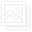
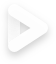
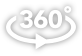
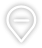

In [13]:
dom = BeautifulSoup(response2.content, 'html.parser')
dom

In [50]:
url = 'view-source:https://pcmap.place.naver.com/restaurant/list?query=성수역 맛집&x=126.92524075393676&y=37.528317&entry=pll&filterId=s13479412&from=nx&fromNxList=true&sessionid=SS5z/ELmZTrqiZI77zWRovRe&ts=1606034886200'
dom = BeautifulSoup(response2.content, 'html.parser')
selector = '#_pcmap_list_scroll_container'

In [51]:
element = dom.select_one(selector)
element.text

'체다앤올리배달햇살 아래 브런치하기 좋은 서울숲 신상 카페4.37방문자리뷰 377블로그리뷰 692출발도착거리뷰아꼬떼 뒤 파르크케이크카페디저트핫플레이스공원4.13방문자리뷰 117블로그리뷰 139출발도착거리뷰센터커피커피가 맛있는 서울숲 카페4.33방문자리뷰 746블로그리뷰 648출발도착거리뷰라떼킹서울숲점카페,디저트방문자리뷰 7출발도착거리뷰클라우드핑크카페방문자리뷰 1블로그리뷰 1출발도착거리뷰'

In [44]:
element = dom.select(selector)
element

SelectorSyntaxError: Invalid character '/' position 0
  line 1:
//*[@id="_business_1469201439"]/div/div/div[3]/span
^ (<string>)

## note-taking
- 계층구조는 보이나 사실은 하나의 단일 페이지가 아니다
- 개발자 도구에서 임의로 페이지에 나타나는 것은 다 보여준다
- 예시
    - A페이지를 보고 있다
    - A가 이동하면서 맛집 side에 있는 B페이지를 실시간으로 가져오게 된다
        - 자바스크립트 렌더링?
    - 하지만 URL은 실제로 다르기 때문에 A를 request했을 경우, A만 긁어올 수 있다
- 프레임 소스 보기
- 위도, 경도가 된다는 건..?
    - 위도, 경도로 지하철 노선을..?
    - 지하철역 주변 맛집.. distance를 이용해서..?

In [56]:
# 빠른 길 찾기, 위도 경도 긁어오기
url3 = 'https://m.map.naver.com/spirra/findCarRoute.nhn?route=route3&output=json&result=web3&coord_type=latlng&search=2&car=0&mileage=12.4&start=127.0790500%2C37.5897990%2C%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C+%EC%A4%91%EB%9E%91%EA%B5%AC+%EB%A9%B4%EB%AA%A92%EB%8F%99&destination=127.0496500%2C37.5421080%2C%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C+%EC%84%B1%EB%8F%99%EA%B5%AC+%EC%84%B1%EC%88%98%EB%8F%991%EA%B0%80'

In [57]:
response3 = requests.get(url3)

In [66]:
# base
response3.json()['routes'][0]['summary']

{'distance': 7337,
 'duration': 1419,
 'bounds': {'left_top': '127.0496500,37.5897972',
  'right_bottom': '127.0801861,37.5415056'},
 'route_option': 2,
 'toll': '0,0,0,0,0,0',
 'taxi_fare': 9200,
 'start': {'address': '서울특별시 중랑구 면목2동', 'location': '127.0790500,37.5897972'},
 'end': {'address': '서울특별시 성동구 성수동1가', 'location': '127.0496500,37.5421056'},
 'road_summary': [{'location': '127.0800139,37.5891667',
   'road_name': '동일로',
   'distance': 5439,
   'congestion': 2,
   'speed': 31},
  {'location': '127.0640000,37.5422417',
   'road_name': '아차산로',
   'distance': 971,
   'congestion': 1,
   'speed': 32},
  {'location': '127.0542361,37.5427722',
   'road_name': '성수일로4길',
   'distance': 317,
   'congestion': 2,
   'speed': 16}],
 'copyrights': 'nhn',
 'engine_version': 'route3',
 'result_version': 'web3',
 'map_version': 'map_1.0.0',
 'coord_type': 'latlng',
 'traffic_time': '202011191934'}

In [67]:
response3.json()['routes'][0]['summary']['start']

{'address': '서울특별시 중랑구 면목2동', 'location': '127.0790500,37.5897972'}

In [68]:
response3.json()['routes'][0]['summary']['end']

{'address': '서울특별시 성동구 성수동1가', 'location': '127.0496500,37.5421056'}

In [69]:
# 길 찾기 심화 해석 필요..
response3.json()['routes']

[{'summary': {'distance': 7337,
   'duration': 1419,
   'bounds': {'left_top': '127.0496500,37.5897972',
    'right_bottom': '127.0801861,37.5415056'},
   'route_option': 2,
   'toll': '0,0,0,0,0,0',
   'taxi_fare': 9200,
   'start': {'address': '서울특별시 중랑구 면목2동',
    'location': '127.0790500,37.5897972'},
   'end': {'address': '서울특별시 성동구 성수동1가', 'location': '127.0496500,37.5421056'},
   'road_summary': [{'location': '127.0800139,37.5891667',
     'road_name': '동일로',
     'distance': 5439,
     'congestion': 2,
     'speed': 31},
    {'location': '127.0640000,37.5422417',
     'road_name': '아차산로',
     'distance': 971,
     'congestion': 1,
     'speed': 32},
    {'location': '127.0542361,37.5427722',
     'road_name': '성수일로4길',
     'distance': 317,
     'congestion': 2,
     'speed': 16}],
   'copyrights': 'nhn',
   'engine_version': 'route3',
   'result_version': 'web3',
   'map_version': 'map_1.0.0',
   'coord_type': 'latlng',
   'traffic_time': '202011191934'},
  'route_fullpath': 

In [12]:
# 네이버 지도_fake user agent version

def star(df):
    
    import time
    star = []
    review = []
    
    from fake_useragent import UserAgent
    
    for i in df['id']:
        try:
            link = f'https://pcmap.place.naver.com/restaurant/{i}/'
            ua = UserAgent()
            response = requests.get(link, headers = {'user-agent': ua.random})
            dom = BeautifulSoup(response.text, 'html.parser')
            selector1 = '#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span._1Y6hi._1A8_M > em'
            selector2 = '#app-root > div > div.place_detail_wrapper > div.place_section.no_margin.GCwOh > div > div > div._3XpyR._2z4r0 > div > span:nth-child(2) > a > em'
            element1 = dom.select_one(selector1).text
            element2 = dom.select_one(selector2).text
            star.append(element1)
            review.append(element2)
        except:
            star.append('N/A')
            review.append('N/A')


    df['star'] = star
    df['reveiw'] = review
    
    return review